In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
import plotly.express as px
import squarify
import matplotlib.pyplot as plt
# %matplotlib inline
pd.options.display.max_rows = 999 


In [ ]:
kaggle_survey = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

In [ ]:
kaggle_survey.drop([0],inplace = True)

In [ ]:
kaggle_survey = kaggle_survey.rename(columns={'Time from Start to Finish (seconds)'	: 'Duration', 'Q1': 'Age' , 'Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Job Title','Q6':'Experience Years','Q7_Part_1':'Python','Q7_Part_2':'R','Q7_Part_3':'SQL','Q7_Part_4':'C','Q7_Part_5':'C++','Q7_Part_6':'Java','Q7_Part_7':'Javascript','Q7_Part_8':'Julia','Q7_Part_9':'Swift','Q7_Part_10':'Bash','Q7_Part_11':'MATLAB','Q7_Part_12':'None','Q7_OTHER':'Other','Q8':'Recommended'})

In [ ]:
kaggle_survey.head(3)

In [ ]:
kaggle_survey.head(5)

first lets adjust some values

In [ ]:
kaggle_survey['Country']= kaggle_survey['Country'].replace(["United States of America","United Kingdom of Great Britain and Northern Ireland","I do not wish to disclose my location","United Arab Emirates"],["USA", "UK","undisclosed","UAE"])

In [ ]:
kaggle_survey['Education'] =kaggle_survey['Education'].replace(["Some college/university study without earning a bachelor’s degree"],["Some college"])

For now we will work only on part of the data set

In [ ]:
kaggle_sub = kaggle_survey.iloc[:,0:21]

In [ ]:
kaggle_sub

# **Lets start by fining the avrage duration for taking the survey**

In [ ]:
kaggle_sub['Duration'] = kaggle_sub['Duration'].astype('float64')
mean_duration = kaggle_sub['Duration'].mean()
print("The mean duration for the survey is: ", round(mean_duration,3))

# **Now lets take a look at the age distribution**

In [ ]:
age_count = kaggle_sub['Age'].value_counts()
age_count

# Lets start by using Matplotlib

In [ ]:
plt.figure(figsize = (15,5),facecolor='white', edgecolor='white')
fig =plt.bar(age_count.index,age_count,color= '#049DD9')
plt.xlabel('Age',color='#049DD9',fontweight='bold')
plt.ylabel('Frequency',color='#049DD9',fontweight='bold')
plt.title("Age Distribution",fontweight='bold',color= '#049DD9')
for bar in fig:
    y_val = bar.get_height()
    y_val1 = y_val+ 0.02
    plt.text(bar.get_x()+bar.get_width()/3,y_val1,y_val)



# **Now Lets see the gender ratios**

In [ ]:
gender_count = kaggle_sub['Gender'].value_counts()
gender_count

In [ ]:
#first iteration
plt.pie(gender_count,labels = gender_count.index)
plt.title('Gender Distribution')


**There is a problem that the many other genders cluster the figure ... so,let's compine them in one bin**

In [ ]:
def gender_compiner (x):
    if (x == 'Prefer not to say') or (x == 'Nonbinary') or x == 'Prefer to self-describe':
        return 'Other'
    else:
        return x

In [ ]:
# lets test it first
(kaggle_sub['Gender'].apply(gender_compiner)).value_counts()

**It works ! ... lets apply**

In [ ]:
kaggle_sub['Gender'] = kaggle_sub['Gender'].apply(gender_compiner)

In [ ]:
gender_count = kaggle_sub['Gender'].value_counts()
gender_count

In [ ]:
explod = (0.1,0.1, 0.1)
plt.figure(figsize = (8,8))

plt.pie(gender_count,explode=explod,labels=gender_count.index,autopct='%1.1f%%',shadow=True)
plt.title('Gender Distribution',fontweight='bold')

**We can see that the number men in the sample is very big relatively**

In [ ]:
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

# **Now lets take a look at the Major nationalities of the sample group**

In [ ]:
country_count = kaggle_sub['Country'].value_counts()
major_country_count = country_count[0:25]
major_country_count

# Using squarify

In [ ]:
plt.figure(figsize= (13,13))
squarify.plot(sizes=major_country_count, label=major_country_count.index, alpha=.8)
plt.axis('off')

In [ ]:
kaggle_sub

# Lets use seaborn

# **Education level distribution for diffrent Job Titles**

In [ ]:
plt.figure(figsize = (25,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_sub['Job Title'], hue = kaggle_sub['Education']) 
plt.xlabel('$Job Title$')
plt.ylabel('$Frequency$')
plt.title('Job title vs education')

***Lets creat a heat map for better visual of correlation***

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.crosstab(kaggle_sub['Education'], kaggle_sub['Job Title'], normalize='columns'),vmin=0.01,cmap=cmap)
plt.title('Correlation between Education level and job title')

# **Years of experience for diffrent Job Titles**

In [ ]:
plt.figure(figsize = (25,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_sub['Job Title'], hue = kaggle_sub['Experience Years']) 
plt.xlabel('$Job Title$')
plt.ylabel('$Frequency$')
plt.title('Job title vs experience years')

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.crosstab(kaggle_sub['Experience Years'], kaggle_sub['Job Title'], normalize='columns'),vmin=0.01,cmap=cmap)
plt.title('Correlation between years of experience and job title')

# **Years of experience vs education**

In [ ]:
plt.figure(figsize = (25,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_sub['Experience Years'], hue = kaggle_sub['Education']) 
plt.xlabel('$Experience Years$')
plt.ylabel('$Frequency$')
plt.title('Years of experience vs education')

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.crosstab(kaggle_sub['Education'], kaggle_sub['Experience Years'], normalize='columns'),vmin=0.01,cmap=cmap)
plt.title('Correlation between education and years of experience')

# **What languages does people form diffrent jobs recommend?**

In [ ]:
plt.figure(figsize = (40,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_sub['Job Title'], hue = kaggle_sub['Recommended']) 
plt.xlabel('$Job Title$')
plt.ylabel('$Frequency$')

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.crosstab(kaggle_sub['Job Title'], kaggle_sub['Recommended'], normalize='columns'),vmin=0.01,cmap=cmap)
plt.title('Correlation between job title and recommendation')

# **What languages does people diffrent experience ears recommend?**

In [ ]:
plt.figure(figsize = (40,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_sub['Experience Years'], hue = kaggle_sub['Recommended']) 
plt.xlabel('$Job Title$')
plt.ylabel('$Frequency$')

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.crosstab(kaggle_sub['Experience Years'], kaggle_sub['Recommended'], normalize='columns'),vmin=0.01,cmap=cmap)
plt.title('Correlation between years of experience and recommendation')

* # Clearly ... Python is the most recommended language for getting started in data science

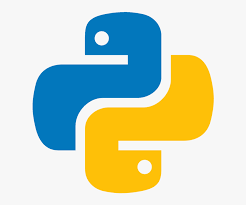

# Lets see the actual distribution for programing languages rather than the recommended

# Lets use plotly for that

In [ ]:
list(kaggle_sub.columns.values)

In [ ]:
Python=kaggle_sub['Python'].count()
R=kaggle_sub['R'].count()
SQL=kaggle_sub['SQL'].count()
C=kaggle_sub['C'].count()
C_plus=kaggle_sub['C++'].count()
Java=kaggle_sub['Java'].count()
Javascript=kaggle_sub['Javascript'].count()
Julia=kaggle_sub['Julia'].count()
Swift=kaggle_sub['Swift'].count()
Bash=kaggle_sub['Bash'].count()
MATLAB=kaggle_sub['MATLAB'].count()
none=kaggle_sub['None'].count()
Other=kaggle_sub['Other'].count()
labels = ['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']
values = [Python,
 R,
 SQL,
 C,
 C_plus,
 Java,
 Javascript,
 Julia,
 Swift,
 Bash,
 MATLAB,
 none,
 Other]
prog_lang = pd.DataFrame(labels)
prog_lang = prog_lang.rename(columns={0: 'language'})
prog_lang.insert(1,column='frequency',value= values)
prog_lang

In [ ]:
px.pie(data_frame=prog_lang,values='frequency',names='language',title = 'programming languages share')

**As we can see pie charts are not the best when the data is divided into many catagories.... lets see the bar chart**

In [ ]:
fig = px.bar(data_frame = prog_lang, x='language', y='frequency',title= 'Programming languages frequency')
fig.show()

**Python is dominate in the current languages of programmers**

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(prog_lang['language'],prog_lang['frequency'])
plt.title('Programming languages frequency')

# **Take a look at the education distribution in each country Throgh the next table**

In [ ]:
coun =kaggle_sub.groupby(['Country','Education']).Education.count()

In [ ]:
coun

# **Cloud prefrences in the survey**

In [ ]:
kaggle_survey = kaggle_survey.rename(columns={'Q11': 'Computing Platform','Q28': 'Cloud Choice'})

In [ ]:
cloud_choice = kaggle_survey['Cloud Choice'].value_counts()
fig = px.bar(x = cloud_choice.index,y = cloud_choice,title = 'Cloud Choice')
fig.show()

**AWS is the most used cloud provider**

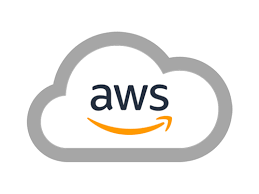

# **User's prefered computing platforms**

In [ ]:
computing_platform = kaggle_survey['Computing Platform'].value_counts()
fig = px.bar(x = computing_platform.index,y = computing_platform,title = 'Computing Platform')
fig.show()

# Most of users just depent on their laptops or PCs

In [ ]:
plt.figure(figsize = (30,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_survey['Job Title'], hue = kaggle_survey['Cloud Choice']) 
plt.xlabel('$Job Title$')
plt.ylabel('$Frequency$')
plt.title('Job Title vs Cloud prefrence')

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.crosstab(kaggle_survey['Job Title'], kaggle_survey['Cloud Choice'], normalize='columns'),vmin=0.01,cmap=cmap)
plt.title('Correlation job title and cloud prefrence')

**Looks like data scientists use other platforms**

**Will years of experience affect the common computing platform?**

In [ ]:
plt.figure(figsize = (30,10))
sns.set_theme(style = "white")
plt.xticks(rotation = 90)
ax = sns.countplot(x = kaggle_survey['Experience Years'], hue = kaggle_survey['Computing Platform']) 
plt.xlabel('$Job Title$')
plt.ylabel('$Frequency$')
plt.title('Job Title vs Cloud prefrence')

**No surprises here**

In [ ]:
#Thank You !